In [2]:
import corner
import numpy as np
from matplotlib import pyplot as plt
import json
from tqdm import tqdm
import tdpy

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    14.0
})

In [3]:
n = 24859
dir = "compact_multi_4"

es = np.zeros(n) * np.nan
m2 = np.zeros(n) * np.nan
a_f = np.zeros(n) * np.nan
a_avg = np.zeros(n) * np.nan
a_std =  np.zeros(n) * np.nan
a_skew =  np.zeros(n) * np.nan
a_ker =  np.zeros(n) * np.nan
d = np.zeros(n) * np.nan
a_in = np.zeros(n) * np.nan
a_out = np.zeros(n) * np.nan

for i in tqdm(range(n)):
    try:
        summary = np.load(f"output/{dir}/{i+1}/summary.npy")
        with open(f"output/{dir}/{i+1}/config.json") as f:
            config = json.load(f)
        m2[i] = config["binary"]["m2"]
        d[i] = config["binary"]["d"]
        es[i] = config["binary"]["e"]
        a_in[i] = config["secondary_0"]["a"]
        a_out[i] = config["secondary_1"]["a"]
        a_f[i] = summary[24, 0]
        a_avg[i] = summary[14, 0]
        a_std[i] = summary[14, 1]
        a_skew[i] = summary[14, 2]
        a_ker[i] = summary[14,3]
        
    except Exception as e:
        print(e)


 42%|████▏     | 10522/24859 [00:05<00:06, 2094.57it/s]

[Errno 2] No such file or directory: 'output/compact_multi_4/10136/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10137/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10147/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10156/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10164/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10166/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10173/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10174/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10181/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10184/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10186/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/10192/summary.npy'
[Errno 2] No such file or directory: 'ou

 82%|████████▏ | 20277/24859 [00:09<00:02, 2113.12it/s]

[Errno 2] No such file or directory: 'output/compact_multi_4/19860/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19873/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19880/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19885/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19887/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19894/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19903/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19914/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19916/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19920/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19925/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/19928/summary.npy'
[Errno 2] No such file or directory: 'ou

100%|██████████| 24859/24859 [00:12<00:00, 2070.23it/s]

[Errno 2] No such file or directory: 'output/compact_multi_4/24798/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24801/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24803/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24806/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24814/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24822/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24827/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24833/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24836/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24840/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24841/summary.npy'
[Errno 2] No such file or directory: 'output/compact_multi_4/24842/summary.npy'
[Errno 2] No such file or directory: 'ou

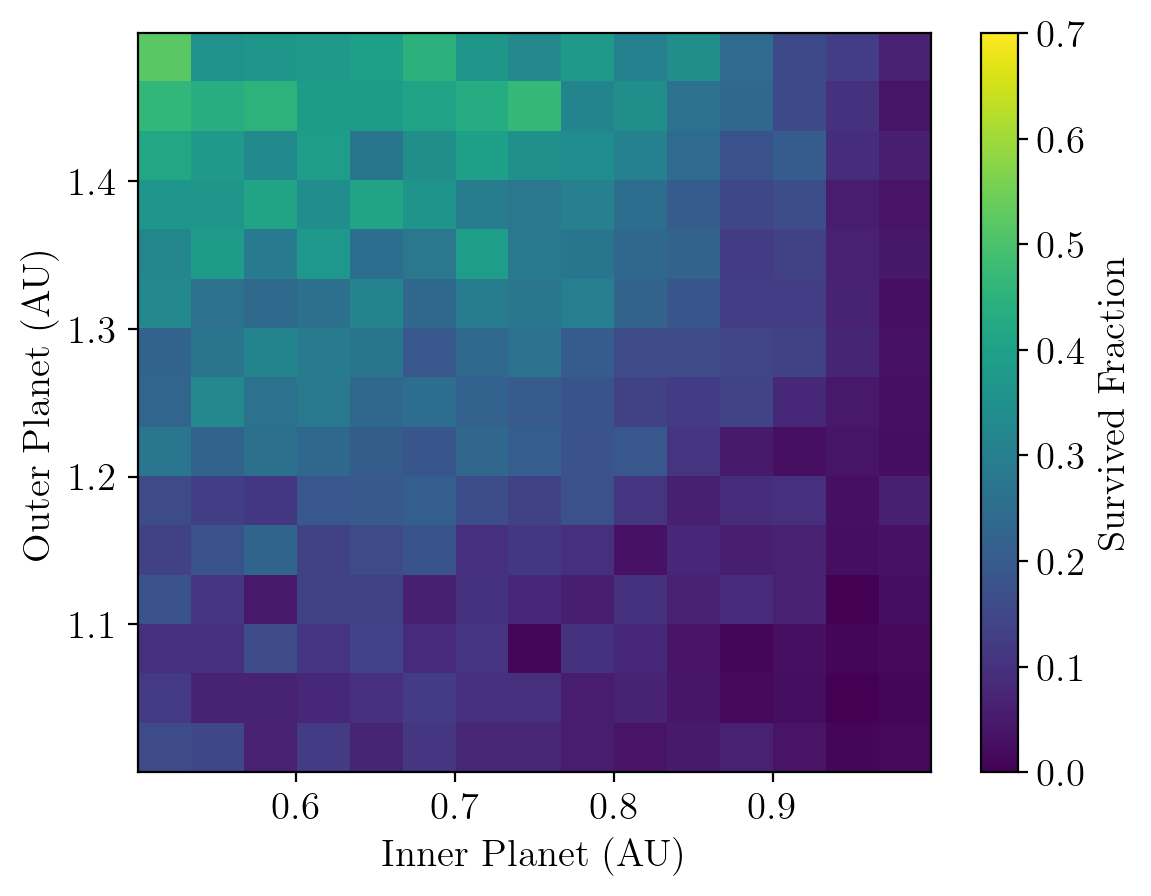

In [5]:
mask = (~np.isnan(d)) * (~np.isnan(m2)) * (~np.isnan(a_f))

hist, x, y = np.histogram2d(a_in[mask], a_out[mask], weights=np.abs(a_f[mask]-d[mask])/d[mask] < 0.3 , bins=15)
bin_counts, _, _ = np.histogram2d(a_in[mask],a_out[mask], bins=15)
hist = hist/bin_counts
plt.imshow(hist, origin="lower", extent=(y.min(), y.max(), x.min(), x.max()), aspect="auto", vmax = 0.7)
plt.colorbar(label="Survived Fraction")
plt.xlabel("Inner Planet (AU)")
plt.ylabel("Outer Planet (AU)")
plt.savefig("2e_survival.eps")


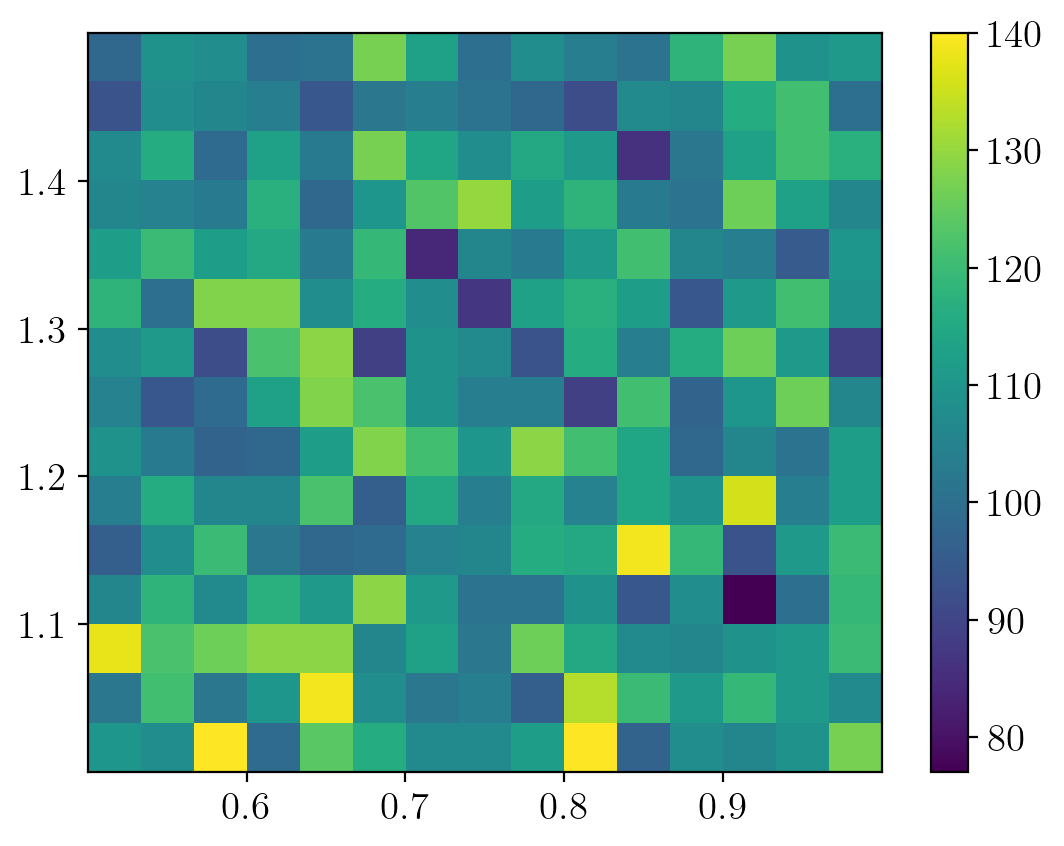

In [6]:
plt.imshow(bin_counts, origin="lower", extent=(y.min(), y.max(), x.min(), x.max()), aspect="auto") 
plt.colorbar()

In [ ]:
np.sum(mask)

16844

In [ ]:
plt.scatter(d, m, c=(a_f>0), alpha=0.1 )
# plt.plot([0,0.5], [.01, .01], "r--")
plt.colorbar()

NameError: name 'plt' is not defined

In [7]:
# labels of the populations
listlablpopl = [r'$\text{sep} > 0.3$', r'$\text{sep}<0.3$']

# number of populations
numbpopl = len(listlablpopl)

# number of samples for each population

# number of features

# generate samples
mask =  (a_f>0) 
listpara = []
listpara.append(np.array([a_in[mask],a_out[mask], a_avg[mask], a_std[mask], a_skew[mask], a_ker[mask]]).T)
mask = (a_f>0)
listpara.append(np.array([a_in[mask],a_out[mask],  a_avg[mask], a_std[mask], a_skew[mask], a_ker[mask]]).T)
# labels of the parameters
listlablpara = [["a_in", ''], ["a_out", ''], ["a_avg", ''], ["a_std", ""], ["a_skew", ""], ["a_ker", ""]]


    
tdpy.plot_grid(listpara, listlablpara, listlablpopl=listlablpopl, boolmakelegd=False, numbbinsplot=10, pathbase="", strgplot="compact_multi")

mkdir: missing operand
Try 'mkdir --help' for more information.


Number of samples in the populations:
$\text{sep}<0.3$
4658
$\text{sep} > 0.3$
4658
Writing to pmar_best_compact_multi.png...


In [ ]:
listpara[0].shape

(1249, 4)

In [ ]:
elements = np.load("output/int_test/14/elements.npy")

In [ ]:
np.vstack((a_avg[a_f>0], a_std[a_f>0], a_skew[a_f>0], a_ker[a_f>0])).shape

(4, 7688)

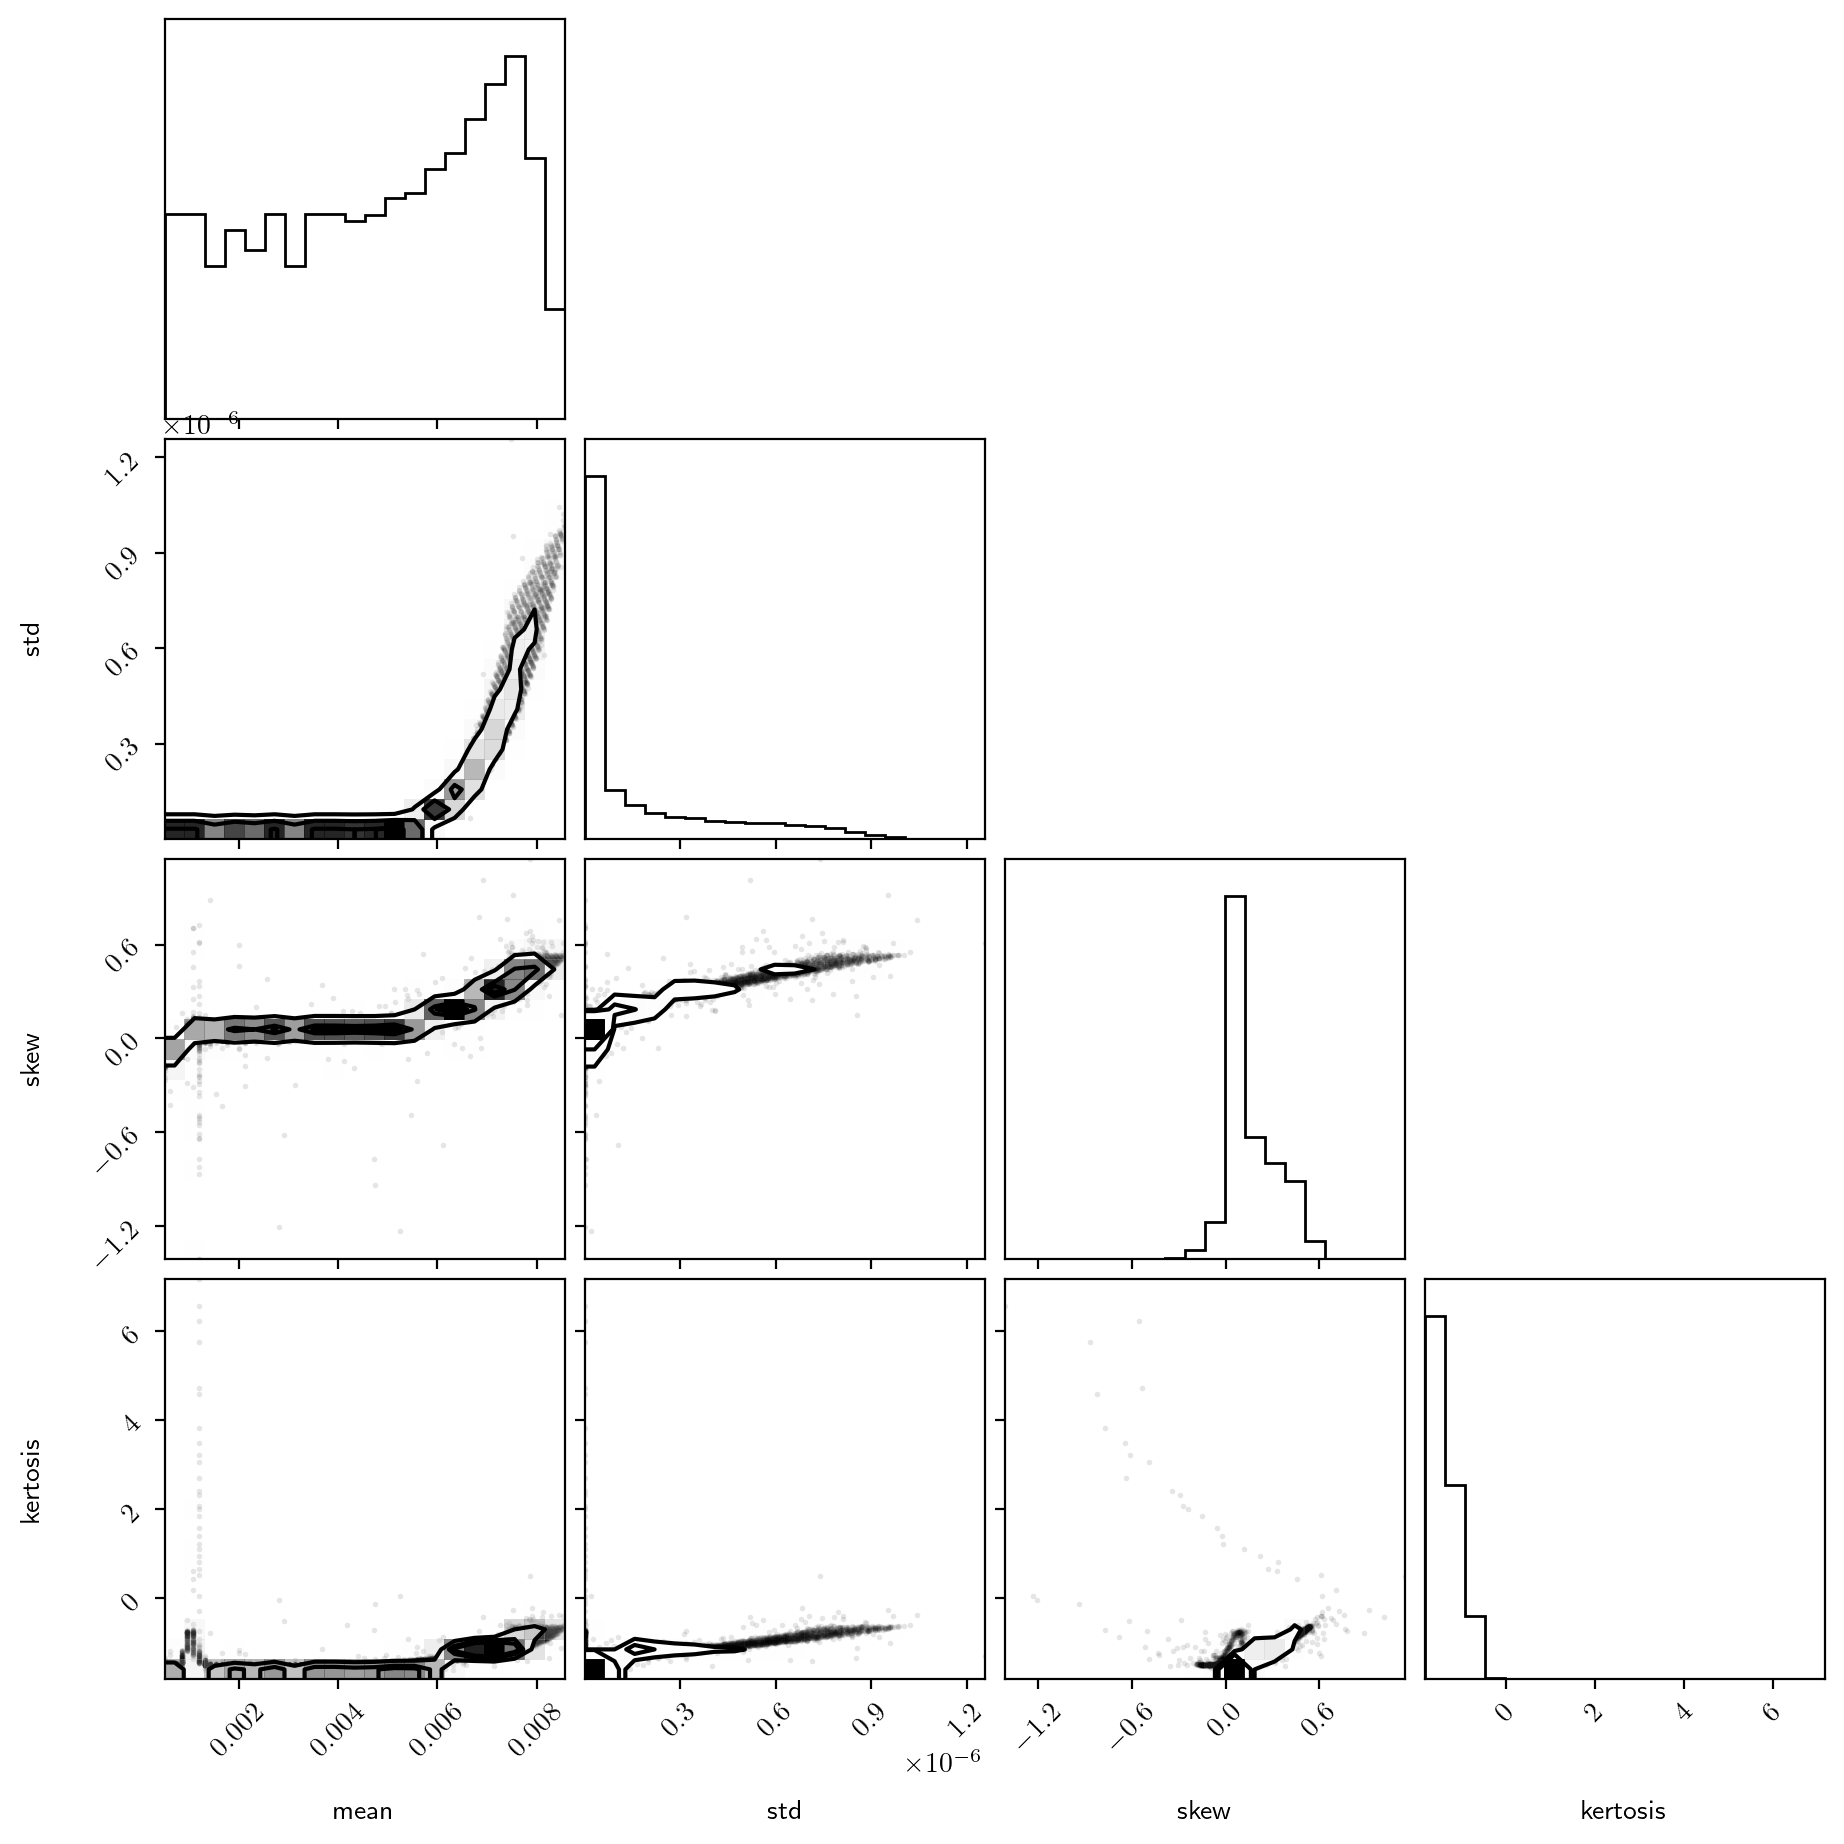

In [ ]:
corner.corner(np.vstack((a_avg[a_f>0], a_std[a_f>0], a_skew[a_f>0], a_ker[a_f>0])).T, labels = ["mean", "std", "skew", "kertosis"])
plt.show()

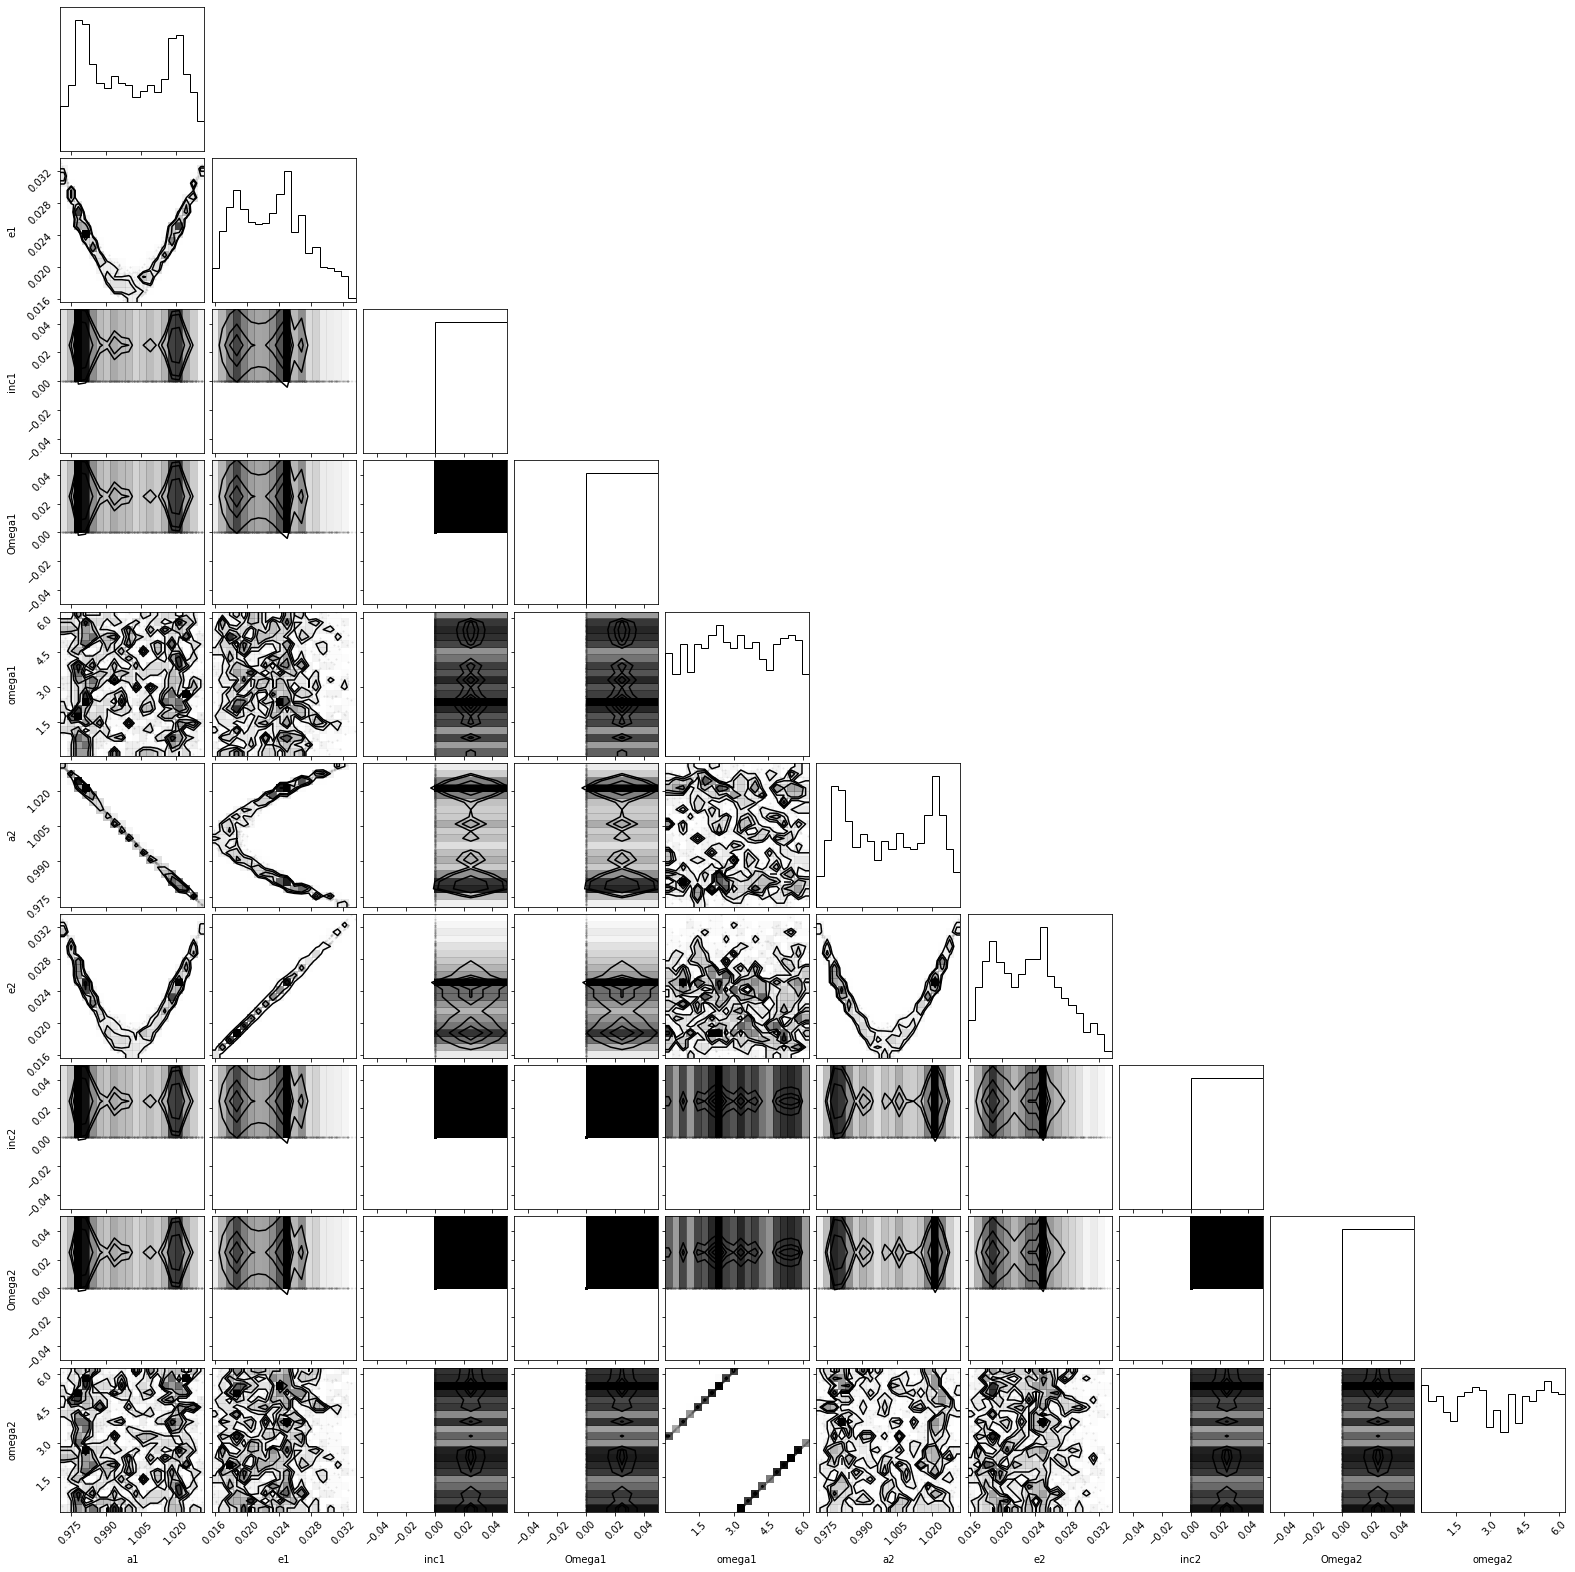

In [ ]:
corner.corner(np.hstack((elements[:,0,:], elements[:,1,:])), range=[.999]*10, labels=["a1", "e1", "inc1", "Omega1", "omega1", "a2", "e2", "inc2", "Omega2", "omega2"])
plt.show()